# Алгоритм для автоматической генерации расписания дополнительных занятий

In [3]:
from abc import ABC, abstractmethod, abstractproperty

## Трассировка и идея алгоритма

В качестве идеи алгоритма будем использовать идею жадного алгоритма. Т.к. сама по себе задача автоматического составления расписания является NP полной задачей, то применение жадного алгоритма позволит её привести к полиномиальной сложности.

Т.к. мы решили использовать жадный алгоритм, то нам необходима некоторая метрика, согласно которой на каждом шаге алгоритма будет делаться выбор. Нам также необходимо определить контекст этого выбора.

Для более понятного объяснения идеи алгоритм представим простой (придуманный) случай входных данных и проведем на них трассировку. В примере будем рассматривать составление расписания на 2 дня.

### Входные данные (придуманные, простые)

Предположим, что у нас 3 группы по основным образовательным программам (будем именовать их как "Г" с индексом, т.е. Г1, Г2, Г3).
В каждой группе есть студенты (их, для простоты будем именовать как "s" с двумя индексами: первый индекс -- номер группы, второй -- номер студента. Такое именования в будущем будет позволять нам проще оперировать данными)

Приведем таблицы того, сколько студентов в каждой группе
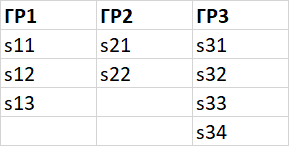



Далее обозначим дополнительные образовательные программы. Будем их обозначать как ДП с индексом. Их будет 3: ДП1, ДП2, ДП3.
Каждый из студентов может выбрать несколько программ. В рамках алгоритма необходимо разделить на группы студентов, выбравших определенные программы дополнительного образования и распределить их в свободные временные ячейки.

Предположим, что таблица по выбранным программам следующая

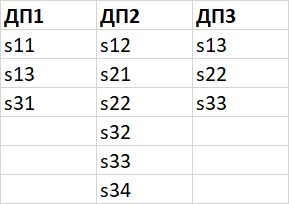


Далее, предположим, что согласно ОСНОВНОМУ РАСПИСАНИЮ у нас имеются занятия у следующих групп

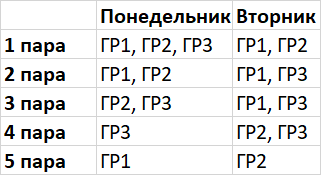


Это были входные данные, а теперь перейдем к трассировке

### Трассировка

1. Для начала составим инвертированную таблицу расписания. Т.е. тех групп, у которых окна

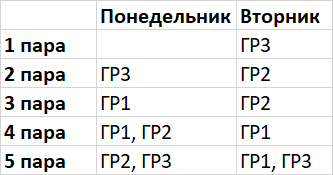


2. Составим таблицу со свободными студентами (используем регулярные выражения для упрощения)

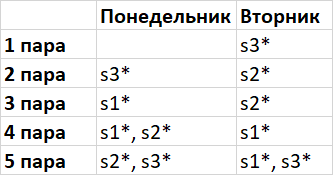

3. После этого по каждой дополнительной образовательной программы составим по таблице, где в каждой ячейке будет указано абсолютное количество записавшихся на нее студентов, которые свободны*.

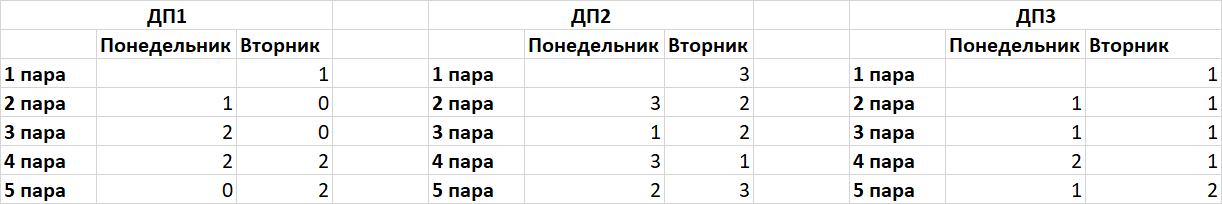


Как мы видим, все эти три таблицы ещё не связаны между собой, т.к. количество студентов задействованных для одной образовательной программы оценивается без учета того, что один и тот же студент может быть задействован в рамках одной и той же образовательной программы одновременно. Поэтому далее необходимо сделать выбор по каждой ячейке и уже скорректировать финальные таблицы. Именно здесь и вступает ЖАДНЫЙ алгоритм.

4. Начинается жадный алгоритм. Сравниваем все три таблицы по ячейкам. Начинаем с 2 пары понедельника (т.к. в первую пару все заняты). Для начала ранжируем ячейки за выбранный временной слот в соответствие с выбранной метриков. В данном случае рассматриваем в качестве метрики количество свободных студентов в временной слот. Берем ячейку с максимальным числом. Фиксируем его. Вносим изменения в таблицы по остальным программам, т.к. теперь, "зафиксированные студенты" уже заняты на этот период. Корректируем таблицу свободных студентов, которую мы делали в начале. Так делаем далее по списку отранжированных ячеек.
							
									
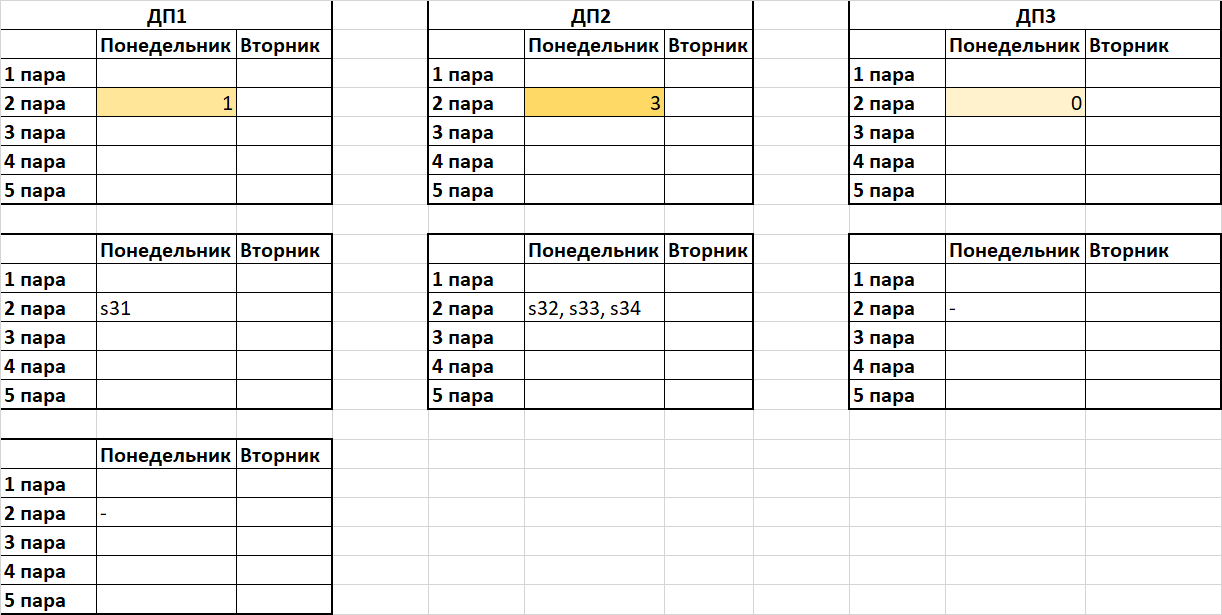

Сразу под таблицами с дополнительными образовательными программами построим таблицы занятых студентов для простоты. Ниже всего построим таблицу свободных студентов

Далее двигаемся в том же духе

								
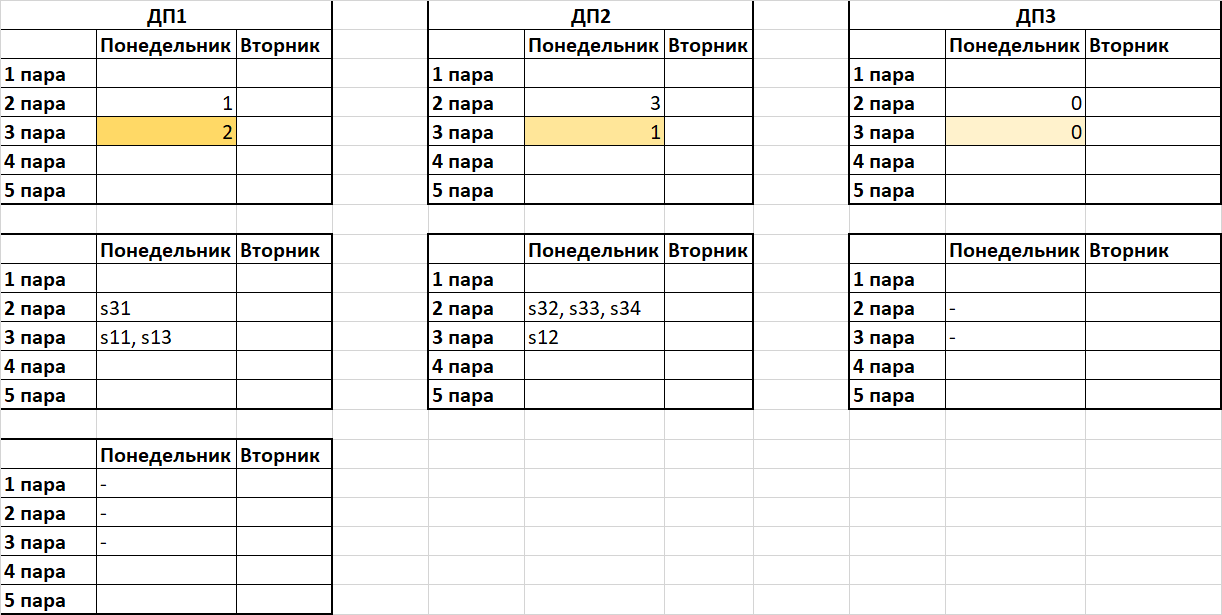

								
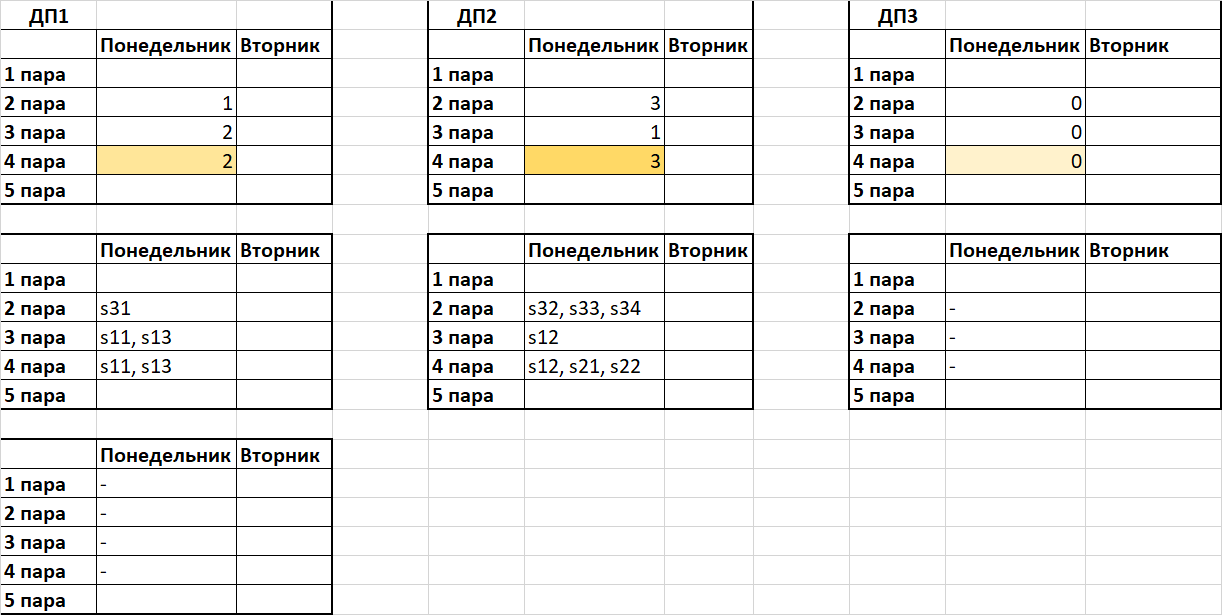

										
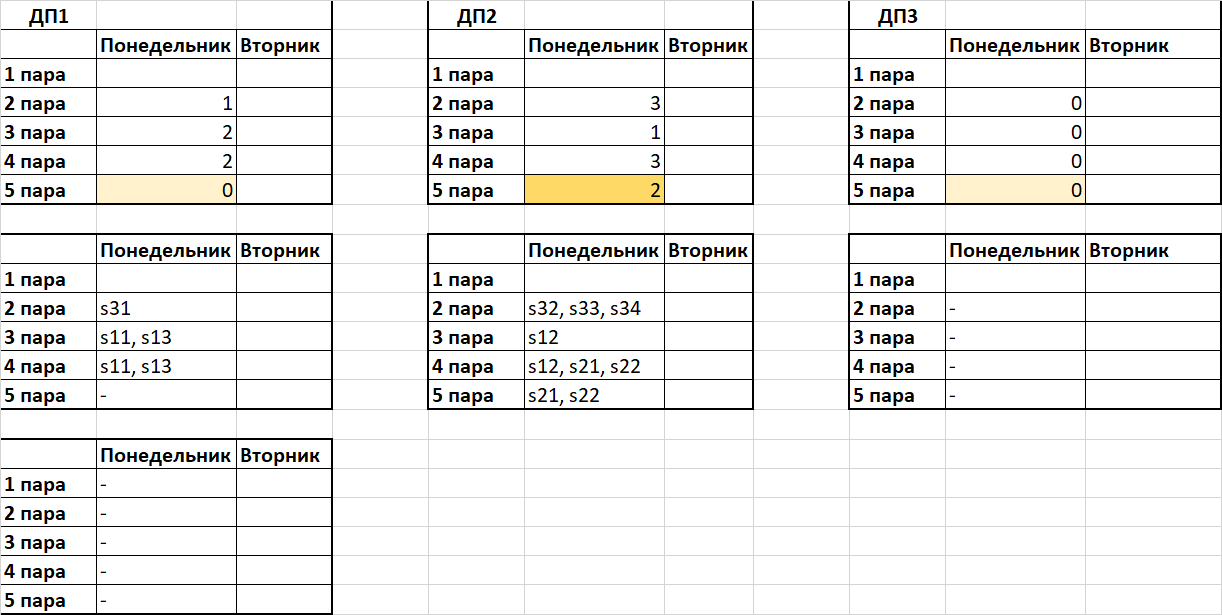



Предположим, что мы закончили эту часть алгоритма. Остановимся на понедельнике для простоты. Далее алгоритм масштабируется аналогичным образом.

5. Далее необходимо выделить группы. Это ещё один заменяемый модуль алгоритма. В данном случае сделаем его простым, будем брать из сформированных таблиц занятых по ДП студентов списки группировок по ячейкам и находить оттуда такие, которые будут максимальны по мощности и в совокупности будут покрывать максимальное количество студентов, записавшихся на ДП.

По итогу разбора (до шага 5) получили следующие таблицы по ДП (с 1 по 3)


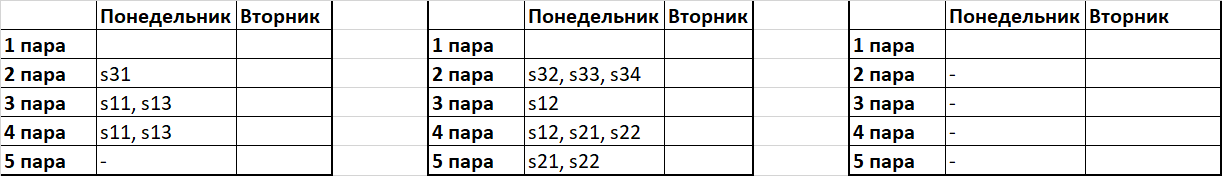

Далее берем максимальные по мощности и минимально пересекающиеся между собой группы и получаем, что их 2: (s31), (s11, s13). Как мы видим, они полностью покрывают тех студентов, которые записались на соответствующую ДП. Далее тоже самое проделываем с ДП2 и ДП3. Получаем, что для ДП2 группы: (s32, s33, s34), (s12, s21, s22) тоже покрывают всех записавшихся студентов. На ДП3, к сожалению групп не удалось набрать**

\* Первое модифицируемое место алгоритма. В качестве метрики, которую мы берем можно брать и другие варианты. Например, относительное число свободных студентов в рамках дополнительной образовательной программы и т.п. В нашем случае возьмем самое простое: абсолютное количество

\** Во-первых, мы рассмотрели только в понедельник. В рамках всей недели, возможно удалось бы найти группы для ДП3. Во-вторых, это один из минусов жадного алгоритма. Т.к. задача автоматического составления расписания является NP полной задачей, а жадный алгоритм работает относительно линейно, то, разумеется, в рамках его применения мы ограничиваем наше решение, и оно не является полным. Однако, настройка жадного алгоритма, включение туда некоторых эвристик и т.д. может позволить получать более качественные результаты: например, во время операции ранжирования при фиксировании занятых студентам по ДП можно для одинаковых значений делать выбор, основываясь на генерации псевдослучайной величины (или придумать что-нибудь поизощреннее, но это уже должно быть полноценное исследование)


## Выделение блоков алгоритма

Нашей задачей стояла разработка прототипа алгоритма, решающего поставленную задачу. Для того, чтобы в дальнейшем другие могли с относительной простотой вносить изменения в алгоритм, мы предлагаем его как совокупность некоторых простых заменяемых блоков, которые выполняют свою маленькую и "глупую" функцию, которая, по сути не имеет представления об алгоритме в целом. Таким образом, заменяя эти функции, мы уже можем настраивать алгоритм и приспосабливать его к жизни. В рамках этого раздела, выделим эти блоки.

1. Блок подготовки промежуточных представлений
2. Блок расчета значений промежуточных таблиц на основе промежуточных данных (т.е. тех таблиц, с которыми будет работать жадный алгоритм, в нашем случае там было просто количество свободных студентов).
3. Блок ранжирования (как раз тот блок, на основе которого жадный алгоритм работает)
4. Блок компоновки групп (тот блок, который отвечает за формирвание групп по отдельным ДП)


Каждый из этих блоков должен представлять собой класс, который имеет метод `process`.
Класс главного алгоритма должен содержать ссылки на интерфейсы этих блоков, а конкретные реализации блоков должны встраиваться в конструкторе класса главного алгоритма.

In [5]:
class PreprocessStage(ABC):
    @abstractmethod
    def process(self, data):
        pass

class MidProcessStage(ABC):
    @abstractmethod
    def process(self, data):
        pass


class RangeProcessStage(ABC):
    @abstractmethod
    def process(self, data):
        pass

class ComposeProcessStage(ABC):
    @abstractmethod
    def process(self, data):
        pass

In [8]:
class TimetableAlg:
    def __init__(self, pre_stage: PreprocessStage,
                 mid_stage: MidProcessStage,
                 range_stage: RangeProcessStage,
                 compose_stage: ComposeProcessStage):
        self._pre_stage = pre_stage
        self._mid_stage = mid_stage
        self._range_stage = range_stage
        self._compose_stage = compose_stage
        
        
    def process(self, data):
        pre_data = self._pre_stage.process(data)
        mid_data = self._mid_stage.process(pre_data)
        
        range_data = self._range_stage.process({pre_data, mid_data})
        compose_data = self._compose_stage.process(range_data)
        return compose_data
        

### Блок подготовки промежуточных представлений
##### Вход
На вход данный блок получает списки студентов в основных группах, списки студентов по ДП, и расписание

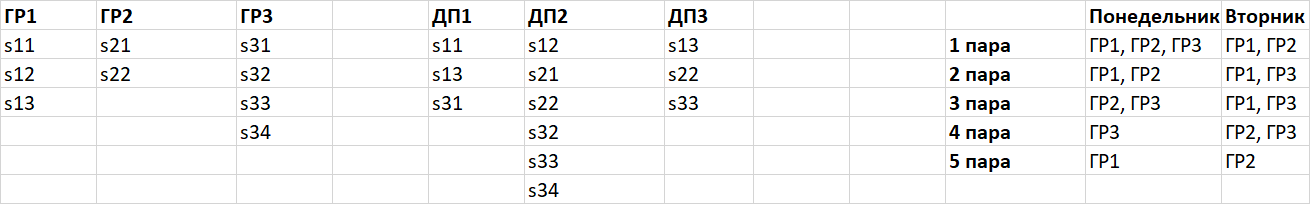

##### Выход

На выходе блок должен выдать таблицу свободных студентов.

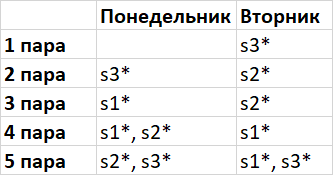

### Блок расчета значений промежуточных таблиц

##### Вход
На вход, как правило может подаваться таблица свободных студентов (которая была составлена в предыдущем блоке). Для более замысловатых вариатов реализации можно прокинуть и другие данные (python это позволит, благодаря динамической типизации). Главное, учитывать это в реализации.

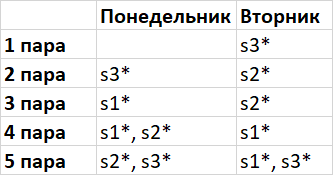

##### Выход

На выходе имеем таблицы под каждую ДП, сгенерированные в соответствие с выбранной в рамках реализации блока метрикой

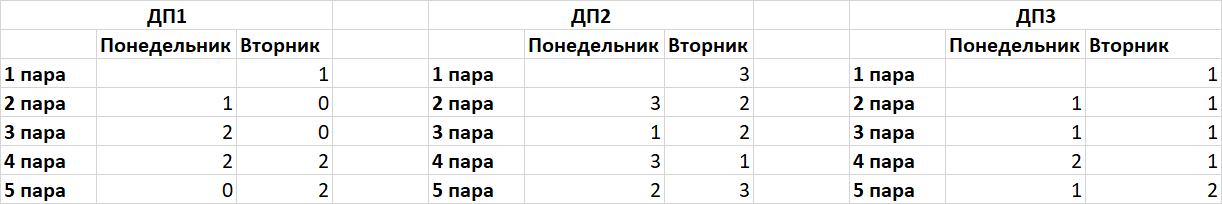



### Блок ранжирования

##### Вход

На входе подаются таблицы, которые сгенерированы предыдущим блоком.

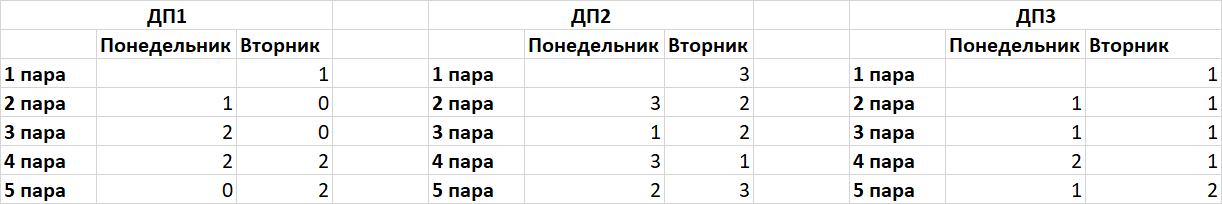

##### Выход

На выходе получаем таблицы с задействованными студентами

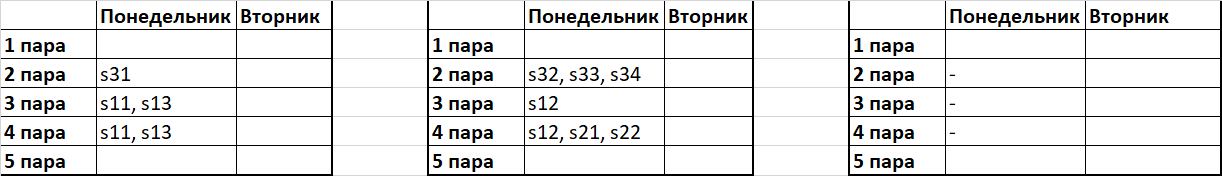


P.s. на самом деле, это не совсем правильно, для ранжирования должен быть блок, который занимается только им, а для операции составления таблиц (частью которой является ранжирование) должен быть другой блок. Но, мы для упрощения, пока сделали так

### Блок компоновки групп

##### Вход

На входе имеем таблицы задействованных в рамках ДП студентов

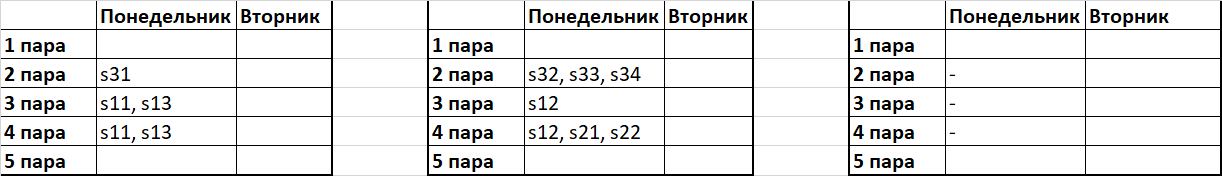

##### Выход

На выходе имеем группы по ДП